<a href="https://colab.research.google.com/github/ucfilho/raianars_june_2020/blob/master/ANN_parallel_coordenate_jun_20_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/Raianars_paper_One


In [2]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=10 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=200 #10 # PONTOS quantas vezes vai alteral NPAR 

mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão
############################### Função

dim=10
#fchoice='Rastrigin' #fchoice='Michalewicz'
fchoice='Schwefel'

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
Fun=Function.Rastrigin
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [4]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

fatal: destination path 'ANN_read_matrix' already exists and is not an empty directory.
/content/Raianars_paper_One/ANN_read_matrix


In [5]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

fields = ['DIr','FRAC Its','Fo','CRo','F','CR']
fields = ['DIr','FRAC Its','Fo','CRo','F','CR']
Num=250
Parallel_Coord=np.zeros((Num,6)) #
Max_DIr=X_max_F[0];Max_Fr=X_max_F[1]
Min_DIr=X_min_F[0];Min_Fr=X_min_F[1];Min_Fr=0
Max_F=X_max_F[2];Max_CR=X_max_F[3]
Min_F=X_min_F[2];Min_CR=X_min_F[3]

In [6]:
Parallel_F_pos=[];Parallel_CR_pos=[]
Parallel_F_neg=[];Parallel_CR_neg=[]
for i in range(Num):
  DIr=  Min_DIr+(Max_DIr-Min_DIr)*np.random.random();
  Frac=Min_Fr+(Max_Fr-Min_Fr)*np.random.random();
  Fo=Min_F+(Max_F-Min_F)*np.random.random();
  CRo=Min_CR+(Max_CR-Min_CR)*np.random.random();
  x_train=np.array([DIr,Frac,Fo,CRo])
  x_train=pd.DataFrame(x_train).T
  x_train=Go2Ann.Normatiza(x_train,X_max_F,X_min_F)
  y_calc_F=Go2Ann.ANN_ycal(syn0_F,syn1_F,x_train)
  y_calc_CR=Go2Ann.ANN_ycal(syn0_CR,syn1_CR,x_train)
  y_cod_F=Go2Ann.Classifica(y_calc_F)
  y_cod_CR=Go2Ann.Classifica(y_calc_CR)
  Parallel_Coord[i,0]=DIr;Parallel_Coord[i,1]=Frac;
  Parallel_Coord[i,2]=Fo;Parallel_Coord[i,3]=CRo;
  Parallel_Coord[i,4]=y_cod_F[0];Parallel_Coord[i,5]=y_cod_CR[0];
  if(y_cod_F[0]>0):
    Parallel_F_pos.append(Parallel_Coord[i,:])
  else:
    Parallel_F_neg.append(Parallel_Coord[i,:])
  if(y_cod_CR[0]>0):
    Parallel_CR_pos.append(Parallel_Coord[i,:])
  else:
    Parallel_CR_neg.append(Parallel_Coord[i,:])

Parallel_Coord=pd.DataFrame(Parallel_Coord,columns =fields)

Parallel_F_pos=pd.DataFrame(Parallel_F_pos,columns =fields)
Parallel_F_neg=pd.DataFrame(Parallel_F_neg,columns =fields)
Parallel_CR_pos=pd.DataFrame(Parallel_CR_pos,columns =fields)
Parallel_CR_neg=pd.DataFrame(Parallel_CR_neg,columns =fields)

In [7]:
print(Parallel_Coord)

          DIr  FRAC Its        Fo       CRo    F   CR
0    1.064570  0.142198  0.457570  0.946421 -1.0  1.0
1    0.489083  0.083457  0.079941  0.476807  1.0  1.0
2    1.089201  0.432726  0.550728  0.328431  1.0 -1.0
3    0.144291  0.418667  0.110298  0.895371 -1.0 -1.0
4    0.826153  0.890626  0.525027  0.645676  1.0  1.0
..        ...       ...       ...       ...  ...  ...
245  1.119688  0.440683  0.831651  0.124372  1.0 -1.0
246  1.185187  0.544161  0.487736  0.145588  1.0 -1.0
247  0.679236  0.012738  0.172951  0.426686 -1.0  1.0
248  0.748932  0.554872  0.485736  0.281099  1.0 -1.0
249  0.595144  0.731383  0.051741  0.321421  1.0 -1.0

[250 rows x 6 columns]


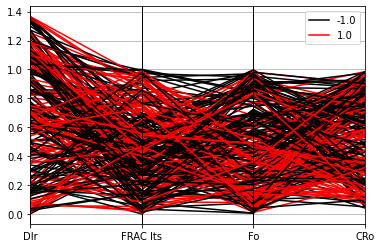

In [8]:


DF_F=Parallel_Coord[['DIr','FRAC Its','Fo','CRo','F']]

plt.figure()
pd.plotting.parallel_coordinates(DF_F, 'F', color=['black','red'])
plt.show()

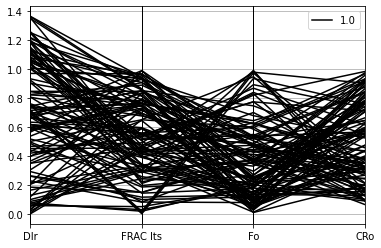

In [9]:
DF_F=Parallel_F_pos[['DIr','FRAC Its','Fo','CRo','F']]

plt.figure()
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')
plt.show()

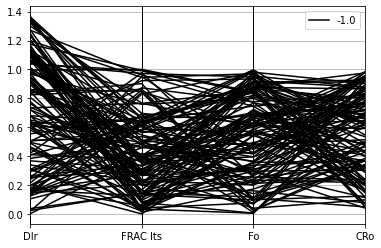

In [10]:
DF_F=Parallel_F_neg[['DIr','FRAC Its','Fo','CRo','F']]

plt.figure()
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')
plt.show()

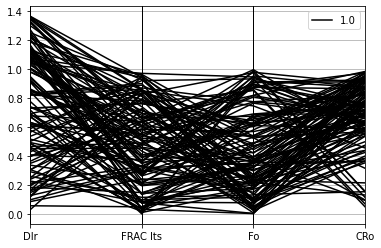

In [11]:
DF_CR=Parallel_CR_pos[['DIr','FRAC Its','Fo','CRo','CR']]

plt.figure()
pd.plotting.parallel_coordinates(DF_CR, 'CR',color='black')
plt.show()

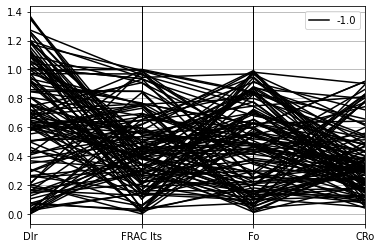

In [12]:
DF_CR=Parallel_CR_neg[['DIr','FRAC Its','Fo','CRo','CR']]

plt.figure()
pd.plotting.parallel_coordinates(DF_CR, 'CR',color='black')
plt.show()